In [1]:
#setup
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
# import os.path as os
import http.client, urllib.request, urllib.parse, urllib.error, base64
# import config
import quickstart
import requests

In [2]:
from pydrive.auth import GoogleAuth
gauth = GoogleAuth()
gauth.LocalWebserverAuth() # Creates local webserver and auto handles authentication.

Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?client_id=570719947456-53haph7mjc317oel1ujh0kmjbfd499jf.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&access_type=offline&response_type=code

Authentication successful.


In [3]:
# files in data_for_viz data google drive
from pydrive.drive import GoogleDrive
drive = GoogleDrive(gauth)
fileList = drive.ListFile({'q': "'17cAqNLK4nFnvyXLoIB-TmkY6CnsrejtL' in parents and trashed=false"}).GetList()
for file in fileList:
  print('Title: %s, ID: %s' % (file['title'], file['id']))
  # Get the folder ID that you want
  if(file['title'] == "To Share"):
      fileID = file['id']

Title: svm_aggregated.csv, ID: 1EkVeQN89TPSJph8tWT9Lra44zQlYUQtc
Title: box_level_svm.csv, ID: 1F5pLxXuhNBtC3PPfnVFuEF7TTMbqUQ4o
Title: pred_prob_naivebayes_box.csv, ID: 18HDx6rUK3YyhsIkqPKILZQqcK7fzGfWL
Title: pred_prob_naivebayes_ct.csv, ID: 18FsUwkRtIe3Y1ea59NfXrUWODM8yC2dv
Title: pred_prob_naivebayes_allbld.csv, ID: 18FUSTzPAm7qhgRPtkDqT7PnHmOM4-Frf
Title: pred_box.csv, ID: 1XfFwrVHP5rPPtbV-ihpgwwzhv9003he2
Title: pred_prob_allbld.csv, ID: 1kjVfdtMhnQS2V3V0qeb5v-g_yjzjY_nO
Title: pred_prob_ct.csv, ID: 1XQjaDJ3mZTvAvR5zx_aZEXHUEyWT3K43


In [4]:
csv = drive.CreateFile({'id': '1kjVfdtMhnQS2V3V0qeb5v-g_yjzjY_nO'})
csv.GetContentFile('pred_prob_allbld.csv')  

pr_prob = pd.read_csv('pred_prob_allbld.csv').drop(["Unnamed: 0"], axis = 1)

census_ct= gpd.read_file("https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Census_Tracts_for_2010_US_Census/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson")

census_ct

,OBJECTID,CTLabel,BoroCode,BoroName,CT2010,BoroCT2010,CDEligibil,NTACode,NTAName,PUMA,Shape__Area,Shape__Length,geometry
0,1,9,5,Staten Island,000900,5000900,E,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016794,"POLYGON ((-74.07921 40.64344, -74.07914 40.643..."
1,2,98,1,Manhattan,009800,1009800,I,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.200308,"POLYGON ((-73.96433 40.75639, -73.96479 40.755..."
2,3,102,1,Manhattan,010200,1010200,I,MN17,Midtown-Midtown South,3807,1.860993e+06,5687.802439,"POLYGON ((-73.97124 40.76094, -73.97170 40.760..."
3,4,104,1,Manhattan,010400,1010400,I,MN17,Midtown-Midtown South,3807,1.864600e+06,5693.036367,"POLYGON ((-73.97446 40.76230, -73.97492 40.761..."
4,5,113,1,Manhattan,011300,1011300,I,MN17,Midtown-Midtown South,3807,1.890907e+06,5699.860640,"POLYGON ((-73.98412 40.75485, -73.98460 40.754..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160,2161,183.02,2,Bronx,018302,2018302,I,BX14,East Concourse-Concourse Village,3708,1.208595e+06,4627.750710,"POLYGON ((-73.91811 40.83001, -73.91729 40.829..."
2161,2162,196,1,Manhattan,019600,1019600,I,MN34,East Harlem North,3804,1.902453e+06,5776.739392,"POLYGON ((-73.93631 40.80303, -73.93677 40.802..."
2162,2163,242,1,Manhattan,024200,1024200,E,MN34,East Harlem North,3804,3.726642e+06,9379.633899,"POLYGON ((-73.92998 40.80299, -73.93015 40.802..."
2163,2164,69,2,Bronx,006900,2006900,E,BX34,Melrose South-Mott Haven North,3710,2.029126e+06,6537.689395,"POLYGON ((-73.91182 40.82204, -73.91217 40.821..."


In [5]:
csv = drive.CreateFile({'id': '18FsUwkRtIe3Y1ea59NfXrUWODM8yC2dv'})
csv.GetContentFile('pred_prob_naivebayes_ct.csv')  

# pred_prob_naivebayes_ct.csv, ID: 18FsUwkRtIe3Y1ea59NfXrUWODM8yC2dv

pr_prob_nb = pd.read_csv('pred_prob_naivebayes_ct.csv').drop(["Unnamed: 0"], axis = 1)

# pr_prob_nb = pd.read_csv("G:/.shortcut-targets-by-id/1hgVHDpl_iZ7es6sKW0QRlC9X6SF58wk7/Machine Learning 4 Cities Final Project/Data/data_for_viz/pred_prob_naivebayes_allbld.csv").drop(["Unnamed: 0"], axis = 1)

In [6]:
pr_prob_merge = pd.merge(pr_prob_nb, pr_prob, on="boroct2010")

In [7]:
pr_prob_merge

,boroct2010,prob_vacate_bl,bbl,prob_fire_dt,prob_fire_rf,vacate_ind
0,1000201,0.237541,1002580001,0.001965,0.005705,0.0
1,1000201,0.237541,1002860003,0.025946,0.027555,0.0
2,1000201,0.237541,1002860001,0.008203,0.027784,0.0
3,1000201,0.237541,1002860002,0.000002,0.002327,0.0
4,1000201,0.237541,1002860005,0.025946,0.038337,0.0
...,...,...,...,...,...,...
765021,5032300,0.013944,5013180213,0.000002,0.000006,0.0
765022,5032300,0.013944,5017170073,0.000002,0.000005,0.0
765023,5032300,0.013944,5013180113,0.000002,0.000816,0.0
765024,5032300,0.013944,5012780063,0.000002,0.000006,0.0


In [8]:
census_ct['boroct2010']= census_ct['BoroCT2010'].astype('int')

In [9]:
census_ct.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2165 entries, 0 to 2164
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       2165 non-null   int64   
 1   CTLabel        2165 non-null   object  
 2   BoroCode       2165 non-null   object  
 3   BoroName       2165 non-null   object  
 4   CT2010         2165 non-null   object  
 5   BoroCT2010     2165 non-null   object  
 6   CDEligibil     2164 non-null   object  
 7   NTACode        2165 non-null   object  
 8   NTAName        2165 non-null   object  
 9   PUMA           2165 non-null   object  
 10  Shape__Area    2165 non-null   float64 
 11  Shape__Length  2165 non-null   float64 
 12  geometry       2165 non-null   geometry
 13  boroct2010     2165 non-null   int32   
dtypes: float64(2), geometry(1), int32(1), int64(1), object(9)
memory usage: 228.5+ KB


In [10]:
pr_prob_ct = pd.merge(pr_prob_merge, census_ct, how='inner', on='boroct2010')

In [11]:
pr_prob_ct

,boroct2010,prob_vacate_bl,bbl,prob_fire_dt,prob_fire_rf,vacate_ind,OBJECTID,CTLabel,BoroCode,BoroName,CT2010,BoroCT2010,CDEligibil,NTACode,NTAName,PUMA,Shape__Area,Shape__Length,geometry
0,1000201,0.237541,1002580001,0.001965,0.005705,0.0,1709,2.01,1,Manhattan,000201,1000201,E,MN28,Lower East Side,3809,9.723123e+05,4754.495088,"POLYGON ((-73.98450 40.70952, -73.98655 40.709..."
1,1000201,0.237541,1002860003,0.025946,0.027555,0.0,1709,2.01,1,Manhattan,000201,1000201,E,MN28,Lower East Side,3809,9.723123e+05,4754.495088,"POLYGON ((-73.98450 40.70952, -73.98655 40.709..."
2,1000201,0.237541,1002860001,0.008203,0.027784,0.0,1709,2.01,1,Manhattan,000201,1000201,E,MN28,Lower East Side,3809,9.723123e+05,4754.495088,"POLYGON ((-73.98450 40.70952, -73.98655 40.709..."
3,1000201,0.237541,1002860002,0.000002,0.002327,0.0,1709,2.01,1,Manhattan,000201,1000201,E,MN28,Lower East Side,3809,9.723123e+05,4754.495088,"POLYGON ((-73.98450 40.70952, -73.98655 40.709..."
4,1000201,0.237541,1002860005,0.025946,0.038337,0.0,1709,2.01,1,Manhattan,000201,1000201,E,MN28,Lower East Side,3809,9.723123e+05,4754.495088,"POLYGON ((-73.98450 40.70952, -73.98655 40.709..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765021,5032300,0.013944,5013180213,0.000002,0.000006,0.0,2154,323,5,Staten Island,032300,5032300,I,SI12,Mariner's Harbor-Arlington-Port Ivory-Granitev...,3903,4.168504e+07,38154.622522,"POLYGON ((-74.17119 40.64175, -74.17129 40.640..."
765022,5032300,0.013944,5017170073,0.000002,0.000005,0.0,2154,323,5,Staten Island,032300,5032300,I,SI12,Mariner's Harbor-Arlington-Port Ivory-Granitev...,3903,4.168504e+07,38154.622522,"POLYGON ((-74.17119 40.64175, -74.17129 40.640..."
765023,5032300,0.013944,5013180113,0.000002,0.000816,0.0,2154,323,5,Staten Island,032300,5032300,I,SI12,Mariner's Harbor-Arlington-Port Ivory-Granitev...,3903,4.168504e+07,38154.622522,"POLYGON ((-74.17119 40.64175, -74.17129 40.640..."
765024,5032300,0.013944,5012780063,0.000002,0.000006,0.0,2154,323,5,Staten Island,032300,5032300,I,SI12,Mariner's Harbor-Arlington-Port Ivory-Granitev...,3903,4.168504e+07,38154.622522,"POLYGON ((-74.17119 40.64175, -74.17129 40.640..."


In [12]:
pr_prob_ct = gpd.GeoDataFrame(pr_prob_ct, geometry='geometry')

In [13]:
pr_prob_ct

,boroct2010,prob_vacate_bl,bbl,prob_fire_dt,prob_fire_rf,vacate_ind,OBJECTID,CTLabel,BoroCode,BoroName,CT2010,BoroCT2010,CDEligibil,NTACode,NTAName,PUMA,Shape__Area,Shape__Length,geometry
0,1000201,0.237541,1002580001,0.001965,0.005705,0.0,1709,2.01,1,Manhattan,000201,1000201,E,MN28,Lower East Side,3809,9.723123e+05,4754.495088,"POLYGON ((-73.98450 40.70952, -73.98655 40.709..."
1,1000201,0.237541,1002860003,0.025946,0.027555,0.0,1709,2.01,1,Manhattan,000201,1000201,E,MN28,Lower East Side,3809,9.723123e+05,4754.495088,"POLYGON ((-73.98450 40.70952, -73.98655 40.709..."
2,1000201,0.237541,1002860001,0.008203,0.027784,0.0,1709,2.01,1,Manhattan,000201,1000201,E,MN28,Lower East Side,3809,9.723123e+05,4754.495088,"POLYGON ((-73.98450 40.70952, -73.98655 40.709..."
3,1000201,0.237541,1002860002,0.000002,0.002327,0.0,1709,2.01,1,Manhattan,000201,1000201,E,MN28,Lower East Side,3809,9.723123e+05,4754.495088,"POLYGON ((-73.98450 40.70952, -73.98655 40.709..."
4,1000201,0.237541,1002860005,0.025946,0.038337,0.0,1709,2.01,1,Manhattan,000201,1000201,E,MN28,Lower East Side,3809,9.723123e+05,4754.495088,"POLYGON ((-73.98450 40.70952, -73.98655 40.709..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765021,5032300,0.013944,5013180213,0.000002,0.000006,0.0,2154,323,5,Staten Island,032300,5032300,I,SI12,Mariner's Harbor-Arlington-Port Ivory-Granitev...,3903,4.168504e+07,38154.622522,"POLYGON ((-74.17119 40.64175, -74.17129 40.640..."
765022,5032300,0.013944,5017170073,0.000002,0.000005,0.0,2154,323,5,Staten Island,032300,5032300,I,SI12,Mariner's Harbor-Arlington-Port Ivory-Granitev...,3903,4.168504e+07,38154.622522,"POLYGON ((-74.17119 40.64175, -74.17129 40.640..."
765023,5032300,0.013944,5013180113,0.000002,0.000816,0.0,2154,323,5,Staten Island,032300,5032300,I,SI12,Mariner's Harbor-Arlington-Port Ivory-Granitev...,3903,4.168504e+07,38154.622522,"POLYGON ((-74.17119 40.64175, -74.17129 40.640..."
765024,5032300,0.013944,5012780063,0.000002,0.000006,0.0,2154,323,5,Staten Island,032300,5032300,I,SI12,Mariner's Harbor-Arlington-Port Ivory-Granitev...,3903,4.168504e+07,38154.622522,"POLYGON ((-74.17119 40.64175, -74.17129 40.640..."


<AxesSubplot:>

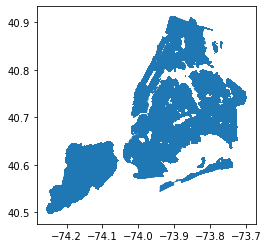

In [14]:
pr_prob_ct.plot()

<AxesSubplot:>

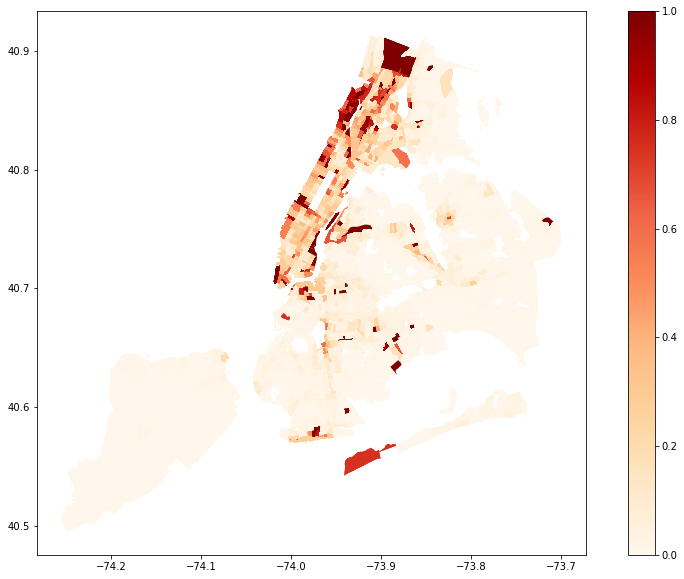

In [22]:
fig, ax = plt.subplots(1, figsize=(15,10))
# scheme = mc.Quantiles(pr_prob_ct["prob_vacate_bl"], k=5)
pr_prob_ct.plot(column='prob_vacate_bl', ax=ax, legend=True, cmap='OrRd')
#plt.axis('off')
# FOR RED OPTION: 'OrRd'

# ALL THE DIFFERENT COLOR OPTIONS:
# 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 
# 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 
# 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 
# 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
# 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 
# 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 
# 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 
# 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 
# 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 
# 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 
# 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 
# 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 
# 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 
# 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 
# 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 
# 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 
# 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 
# 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 
# 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 
# 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 
# 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 
# 'viridis_r', 'winter', 'winter_r'

<AxesSubplot:>

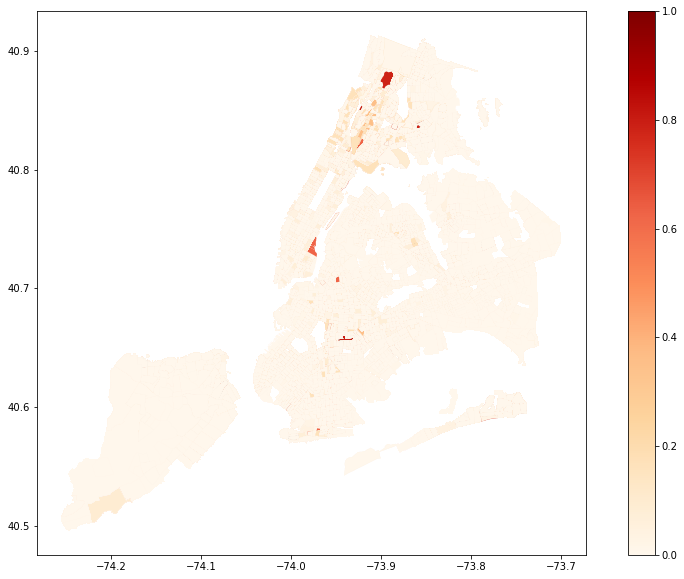

In [23]:
fig, ax = plt.subplots(1, figsize=(15,10))
pr_prob_ct.plot(column='prob_fire_dt', ax=ax, legend=True, cmap='OrRd')
#plt.axis('off')

<AxesSubplot:>

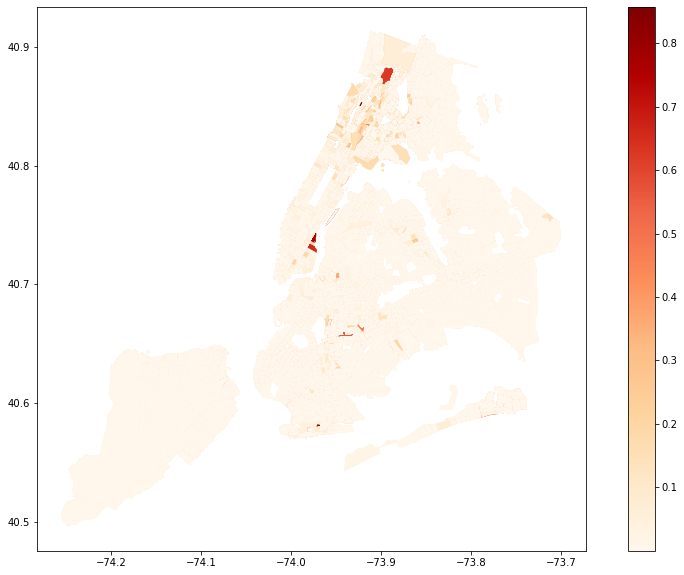

In [24]:
fig, ax = plt.subplots(1, figsize=(15,10))
pr_prob_ct.plot(column='prob_fire_rf', ax=ax, legend=True, cmap='OrRd')
#plt.axis('off')

<AxesSubplot:>

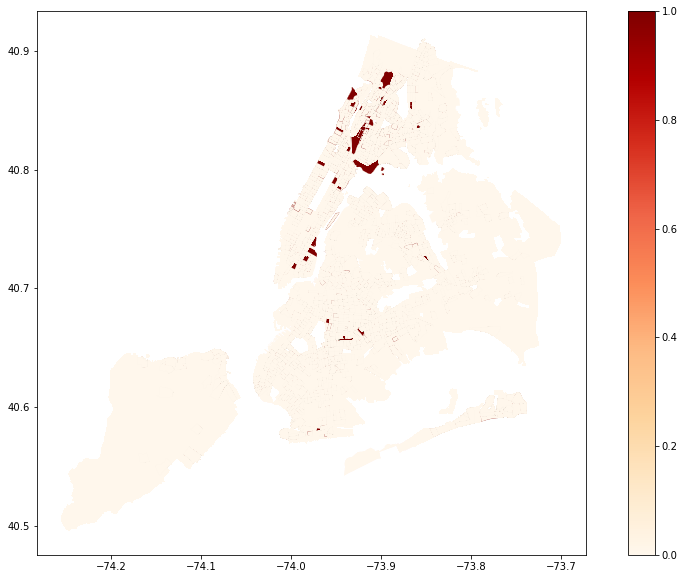

In [18]:
fig, ax = plt.subplots(1, figsize=(15,10))
pr_prob_ct.plot(column='vacate_ind', ax=ax, legend=True, cmap='OrRd')

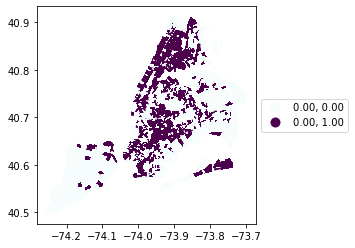

In [49]:
#%matplotlib inline
#ax = pr_prob_ct.plot(column='vacate_ind', scheme='QUANTILES', k=2, \
#             cmap='BuPu', legend=True,
#             legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})

In [9]:
#Load SVM results
csv = drive.CreateFile({'id': '1EkVeQN89TPSJph8tWT9Lra44zQlYUQtc'})
csv.GetContentFile('svm_aggregated.csv')  

# pred_prob_naivebayes_ct.csv, ID: 18FsUwkRtIe3Y1ea59NfXrUWODM8yC2dv

pr_svm = pd.read_csv('svm_aggregated.csv').drop(["Unnamed: 0"], axis = 1)

# pr_prob_nb = pd.read_csv("G:/.shortcut-targets-by-id/1hgVHDpl_iZ7es6sKW0QRlC9X6SF58wk7/Machine Learning 4 Cities Final Project/Data/data_for_viz/pred_prob_naivebayes_allbld.csv").drop(["Unnamed: 0"], axis = 1)

In [11]:
#pr_svm.rename(columns={'prob_vacate_bl': 'pr_svm'})
pr_svm.head()

,boroct2010,svm_vacate_bl
0,1000201,0.0
1,1000202,0.0
2,1000600,0.0
3,1000700,0.0
4,1000800,0.0


In [12]:
census_ct2= gpd.read_file("https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Census_Tracts_for_2010_US_Census/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson")


In [13]:
census_ct2['boroct2010']= census_ct2['BoroCT2010'].astype('int')

In [14]:
pr_prob_ct2 = pd.merge(pr_svm, census_ct2, how='inner', on='boroct2010')

In [15]:
pr_prob_ct2 = gpd.GeoDataFrame(pr_prob_ct2, geometry='geometry')

In [16]:
pr_prob_ct2

,boroct2010,svm_vacate_bl,OBJECTID,CTLabel,BoroCode,BoroName,CT2010,BoroCT2010,CDEligibil,NTACode,NTAName,PUMA,Shape__Area,Shape__Length,geometry
0,1000201,0.000000,1709,2.01,1,Manhattan,000201,1000201,E,MN28,Lower East Side,3809,9.723123e+05,4754.495088,"POLYGON ((-73.98450 40.70952, -73.98655 40.709..."
1,1000202,0.000000,1690,2.02,1,Manhattan,000202,1000202,E,MN28,Lower East Side,3809,3.315114e+06,8568.088924,"MULTIPOLYGON (((-73.98364 40.70960, -73.98450 ..."
2,1000600,0.000000,1710,6,1,Manhattan,000600,1000600,E,MN28,Lower East Side,3809,2.582705e+06,6976.286508,"POLYGON ((-73.99022 40.71441, -73.98934 40.714..."
3,1000700,0.000000,1836,7,1,Manhattan,000700,1000700,I,MN25,Battery Park City-Lower Manhattan,3810,2.439446e+06,9763.042546,"MULTIPOLYGON (((-74.00746 40.70723, -74.00678 ..."
4,1000800,0.000000,1086,8,1,Manhattan,000800,1000800,E,MN27,Chinatown,3809,2.366871e+06,6362.785851,"POLYGON ((-73.99191 40.70953, -73.99204 40.709..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105,5030301,0.000000,1989,303.01,5,Staten Island,030301,5030301,I,SI12,Mariner's Harbor-Arlington-Port Ivory-Granitev...,3903,7.812145e+06,18499.084781,"POLYGON ((-74.14623 40.62493, -74.14651 40.624..."
2106,5030302,0.000000,1990,303.02,5,Staten Island,030302,5030302,I,SI12,Mariner's Harbor-Arlington-Port Ivory-Granitev...,3903,9.788187e+06,13923.063769,"POLYGON ((-74.16050 40.62654, -74.16025 40.626..."
2107,5031901,0.000000,1699,319.01,5,Staten Island,031901,5031901,E,SI12,Mariner's Harbor-Arlington-Port Ivory-Granitev...,3903,4.126613e+06,8255.013642,"POLYGON ((-74.16050 40.62654, -74.16118 40.626..."
2108,5031902,0.001232,1884,319.02,5,Staten Island,031902,5031902,E,SI12,Mariner's Harbor-Arlington-Port Ivory-Granitev...,3903,7.019481e+06,18067.478723,"POLYGON ((-74.16023 40.63835, -74.16015 40.638..."


<AxesSubplot:>

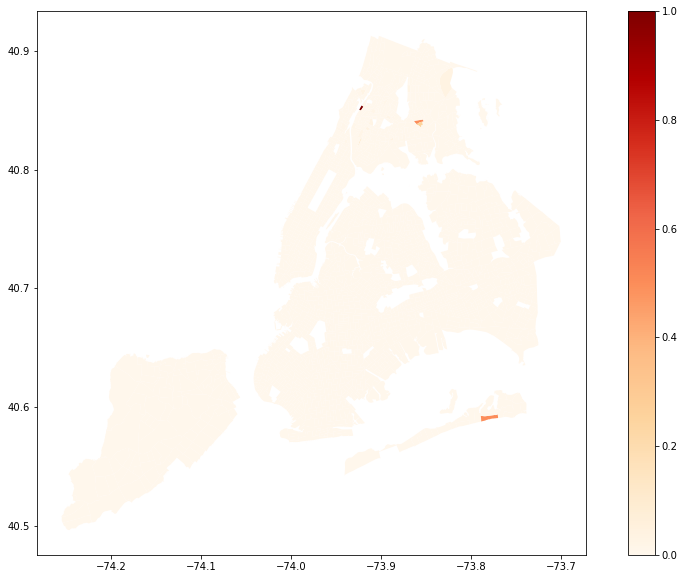

In [17]:
fig, ax = plt.subplots(1, figsize=(15,10))
pr_prob_ct2.plot(column='svm_vacate_bl', ax=ax, legend=True, cmap='OrRd')